In [4]:
from model import WaveNet
import torch

We want to generate the next sequence and keep on generating by appending it to inputs and generating again

In [15]:
inputs = torch.randn((1, 1, 500)) * 0.1
inputs.shape, inputs.max(), inputs.min()

(torch.Size([1, 1, 500]), tensor(0.2906), tensor(-0.3098))

In [41]:
model = WaveNet(2, 2, 2)

In [21]:
from preprocess import decodeMuLaw

In [22]:
prob = model(inputs)
category = torch.argmax(prob)
pred = decodeMuLaw(category)
pred

tensor(-0.0039)

In [26]:
torch.cat((inputs, pred.view(1,1,1)), dim=2).shape

torch.Size([1, 1, 501])

In [45]:
from preprocess import decodeMuLaw

steps = 100

x = inputs
for _ in range(steps):
    prob = model(inputs)
    category = torch.argmax(prob)
    pred = decodeMuLaw(category)
    x = torch.cat((x, pred.view(1,1,1)), dim=2)

In [46]:
import matplotlib.pyplot as plt

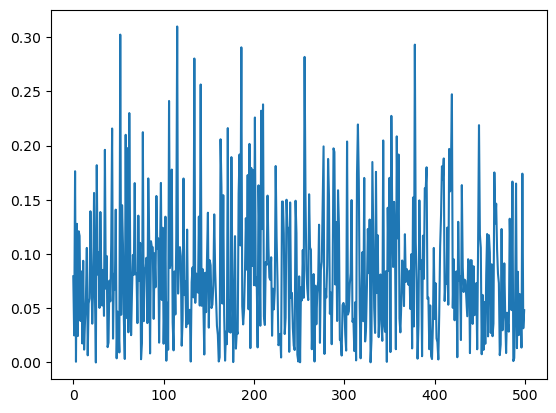

In [47]:
plt.plot(inputs.view(-1));

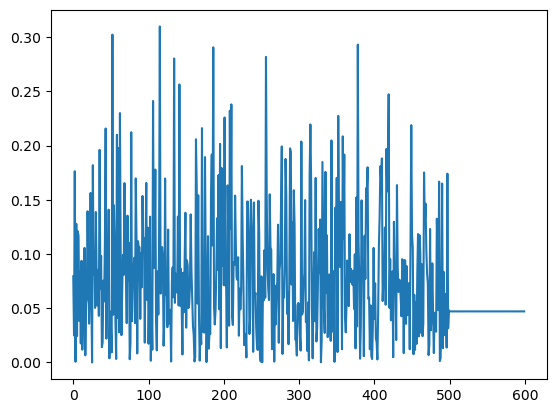

In [48]:
plt.plot(x.view(-1));

In [52]:
from preprocess import decodeMuLaw

def generate(model, inputs, time_steps):
    x = inputs
    for _ in range(steps):
        prob = model(inputs)
        category = torch.argmax(prob)
        pred = decodeMuLaw(category)
        x = torch.cat((x, pred.view(1,1,1)), dim=2)
    
    return x

In [54]:
inputs.shape

torch.Size([1, 1, 500])

In [53]:
generate(model, inputs, 100).shape

torch.Size([1, 1, 600])